# CFB Predictions

## Data Source:

collegefootballdata.com

### Query Parameters

WeekX-Games.csv: "Games and Results", Week = X, Division = fbs 

Player-PPA.csv: "Player Predicted Points Added by Season", Minimum of 1 snap (Threshold), Exclude Garbage Time

Player-Snaps.csv: "Player Usage metrics by season", Exclude Garbage Time

Team-Plays.csv: "Advanced Team Metrics by season", Exclude Garbage Time, Add Games manually

In [71]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt

,Id,Season,Week,Season Type,Neutral Site,Conference Game,Venue Id,Venue,Home Id,Home Team,Home Conference,Home Division,Home Pregame Elo,Away Id,Away Team,Away Conference,Away Division,Away Pregame Elo
0,401525499,2023,3,regular,False,False,3948,Hard Rock Stadium,2390,Miami,ACC,fbs,1693,2065,Bethune-Cookman,SWAC,fcs,NaN
1,401531428,2023,3,regular,False,True,3805,Liberty Bowl Memorial Stadium,235,Memphis,American Athletic,fbs,1564,2426,Navy,American Athletic,fbs,1320.0
2,401531396,2023,3,regular,False,False,3604,Alamodome,2636,UT San Antonio,American Athletic,fbs,1514,349,Army,FBS Independents,fbs,1530.0
3,401520231,2023,3,regular,False,False,3665,Maryland Stadium,120,Maryland,Big Ten,fbs,1522,258,Virginia,ACC,fbs,1424.0
4,401532581,2023,3,regular,False,True,3713,Falcon Stadium,2005,Air Force,Mountain West,fbs,1650,328,Utah State,Mountain West,fbs,1553.0


In [44]:
#Code Cell for function definitions
def elo_win_prob(home_elo, away_elo):
    elo_diff = home_elo - away_elo
    s = 400 #Scaling factor
    return 1/(1+10**(-elo_diff/s))



In [83]:
week3 = pd.read_csv("Week3-Games.csv")
week3 = week3.dropna().reset_index(drop=True) #Apparently I'm running an old pandas version
week3["Home Win Prob"] = elo_win_prob(week3["Home Pregame Elo"], week3["Away Pregame Elo"])
week3.head()

,Id,Season,Week,Season Type,Neutral Site,Conference Game,Venue Id,Venue,Home Id,Home Team,Home Conference,Home Division,Home Pregame Elo,Away Id,Away Team,Away Conference,Away Division,Away Pregame Elo,Home Win Prob
0,401531428,2023,3,regular,False,True,3805,Liberty Bowl Memorial Stadium,235,Memphis,American Athletic,fbs,1564,2426,Navy,American Athletic,fbs,1320.0,0.802909
1,401531396,2023,3,regular,False,False,3604,Alamodome,2636,UT San Antonio,American Athletic,fbs,1514,349,Army,FBS Independents,fbs,1530.0,0.476990
2,401520231,2023,3,regular,False,False,3665,Maryland Stadium,120,Maryland,Big Ten,fbs,1522,258,Virginia,ACC,fbs,1424.0,0.637408
3,401532581,2023,3,regular,False,True,3713,Falcon Stadium,2005,Air Force,Mountain West,fbs,1650,328,Utah State,Mountain West,fbs,1553.0,0.636077
4,401520249,2023,3,regular,False,False,347,Camp Randall Stadium,275,Wisconsin,Big Ten,fbs,1753,290,Georgia Southern,Sun Belt,fbs,1414.0,0.875604


### Player PPA Dataframe

This dataframe contains every player's Average Rush and Pass PPA (Predicted Points Added), as well as how many countable plays these figures are based on. 

In [84]:
player_ppa = pd.read_csv("Player-PPA.csv")
player_ppa.head()

,Season,Name,Position,Team,Conference,CountablePlays,AveragePPA All,AveragePPA Pass,AveragePPA Rush,TotalPPA All,TotalPPA Pass,TotalPPA Rush
0,2023,Joseph Bearns III,TE,Charlotte,American Athletic,1,-4.214,-4.214,NaN,-4.214,-4.214,NaN
1,2023,Yamir Knight,WR,James Madison,Sun Belt,1,-4.084,NaN,-4.084,-4.084,NaN,-4.084
2,2023,Dante Lang,TE,Florida,SEC,1,-3.718,-3.718,NaN,-3.718,-3.718,NaN
3,2023,Stephan Bracey,WR,Central Michigan,Mid-American,1,-2.523,NaN,-2.523,-2.523,NaN,-2.523
4,2023,Cole Kramer,QB,Minnesota,Big Ten,2,-2.110,-4.063,-0.157,-4.220,-4.063,-0.157


### Player Snaps Dataframe

This dataframe contains every player's usage in games, where Pass Usage indicates what percentage of passing plays that player had a pass, incompletion, reception, or target, and Rush Usage indicates what percentage of rushing plays that player rushed.

In [85]:
player_snaps = pd.read_csv("Player-Snaps.csv")
player_snaps.head()

,Season,Name,Position,Team,Conference,Usage Overall,Usage Pass,Usage Rush
0,2023,Brayden Schager,QB,Hawai'i,Mountain West,0.7159,0.9832,0.1625
1,2023,Shedeur Sanders,QB,Colorado,Pac-12,0.6964,0.9800,0.1216
2,2023,Jacob Zeno,QB,UAB,American Athletic,0.6827,0.9919,0.2410
3,2023,Nick Vattiato,QB,Middle Tennessee,Conference USA,0.6811,0.9813,0.2763
4,2023,Tyler Shough,QB,Texas Tech,Big 12,0.6545,0.8790,0.3804


### Team Plays Dataframe

This dataframe contains how many offensive plays each team has run, how many games they've played so far this season (manually added to the csv), how many of those plays were rushing or passing plays, and the defensive rushing and pass PPA.

In [86]:
team_plays = pd.read_csv("Team-Plays.csv")
team_plays["Tempo"] = team_plays["Offense Plays"]/team_plays["Games"] #Tempo: Avg. Offensive plays run per game
team_plays["Pass Snaps"] = team_plays["Tempo"]*team_plays["Offense PassingPlays Rate"]
team_plays["Rush Snaps"] = team_plays["Tempo"]*team_plays["Offense RushingPlays Rate"]
team_plays.head()

,Season,Team,Conference,Offense Plays,Games,Offense RushingPlays Rate,Offense PassingPlays Rate,Defense RushingPlays Ppa,Defense PassingPlays Ppa,Tempo,Pass Snaps,Rush Snaps
0,2023,Boston College,ACC,205,3,0.541463,0.453659,0.059420,0.397810,68.333333,31.000000,37.000000
1,2023,Clemson,ACC,181,3,0.458564,0.541436,0.070458,-0.195335,60.333333,32.666667,27.666667
2,2023,Duke,ACC,156,3,0.544872,0.455128,0.162072,0.020081,52.000000,23.666667,28.333333
3,2023,Florida State,ACC,175,3,0.520000,0.480000,0.136165,0.178270,58.333333,28.000000,30.333333
4,2023,Georgia Tech,ACC,50,3,0.440000,0.560000,0.001444,0.646436,16.666667,9.333333,7.333333


## Data Manipulation

In [87]:
passes = [] #List so pandas doesn't yell at us
rushes = []
for i in range(player_snaps.shape[0]):
    pass_snaps = float(team_plays[team_plays["Team"] == player_snaps["Team"].loc[i]]["Pass Snaps"]) #Lookup team rush/pass snaps
    rush_snaps = float(team_plays[team_plays["Team"] == player_snaps["Team"].loc[i]]["Rush Snaps"]) #Float conversions cause pandas
    passes.append(pass_snaps * float(player_snaps["Usage Pass"].loc[i])) #Calculate average player rush/pass snaps per game
    rushes.append(pass_snaps * float(player_snaps["Usage Rush"].loc[i]))
    
player_snaps["Pass Snaps"] = passes
player_snaps["Rush Snaps"] = rushes
player_snaps.head()

,Season,Name,Position,Team,Conference,Usage Overall,Usage Pass,Usage Rush,Pass Snaps,Rush Snaps
0,2023,Brayden Schager,QB,Hawai'i,Mountain West,0.7159,0.9832,0.1625,37.853200,6.256250
1,2023,Shedeur Sanders,QB,Colorado,Pac-12,0.6964,0.9800,0.1216,48.020000,5.958400
2,2023,Jacob Zeno,QB,UAB,American Athletic,0.6827,0.9919,0.2410,36.039033,8.756333
3,2023,Nick Vattiato,QB,Middle Tennessee,Conference USA,0.6811,0.9813,0.2763,31.401600,8.841600
4,2023,Tyler Shough,QB,Texas Tech,Big 12,0.6545,0.8790,0.3804,34.281000,14.835600


In [88]:
temp_snaps = player_snaps.drop(columns=["Season","Position","Team","Conference","Usage Overall","Usage Pass", "Usage Rush"])
player_ppa = player_ppa.merge(temp_snaps, on="Name")
player_ppa = player_ppa.fillna(0) #Replace NaN with 0
player_ppa.head()

,Season,Name,Position,Team,Conference,CountablePlays,AveragePPA All,AveragePPA Pass,AveragePPA Rush,TotalPPA All,TotalPPA Pass,TotalPPA Rush,Pass Snaps,Rush Snaps
0,2023,Joseph Bearns III,TE,Charlotte,American Athletic,1,-4.214,-4.214,0.000,-4.214,-4.214,0.000,0.312000,0.000000
1,2023,Yamir Knight,WR,James Madison,Sun Belt,1,-4.084,0.000,-4.084,-4.084,0.000,-4.084,0.000000,0.241800
2,2023,Dante Lang,TE,Florida,SEC,1,-3.718,-3.718,0.000,-3.718,-3.718,0.000,0.305067,0.000000
3,2023,Stephan Bracey,WR,Central Michigan,Mid-American,1,-2.523,0.000,-2.523,-2.523,0.000,-2.523,0.000000,0.173067
4,2023,Cole Kramer,QB,Minnesota,Big Ten,2,-2.110,-4.063,-0.157,-4.220,-4.063,-0.157,0.333667,0.288167


In [53]:
home_off = []
away_off = []
for i in range(week3.shape[0]):
    home = week3["Home Team"].loc[i]
    away = week3["Away Team"].loc[i]
    home_players = player_ppa[player_ppa["Team"] == home]
    away_players = player_ppa[player_ppa["Team"] == away]
    home_pts = home_players["Pass Snaps"]*home_players["AveragePPA Pass"] + home_players["Rush Snaps"]*home_players["AveragePPA Rush"]
    away_pts = away_players["Pass Snaps"]*away_players["AveragePPA Pass"] + away_players["Rush Snaps"]*away_players["AveragePPA Rush"]
    home_off.append(home_pts.sum())
    away_off.append(away_pts.sum())
    
    
week3["Raw Offense (Home)"] = home_off
week3["Raw Offense (Away)"] = away_off
week3.head()

,Id,Season,Week,Season Type,Neutral Site,Conference Game,Venue Id,Venue,Home Id,Home Team,...,Home Division,Home Pregame Elo,Away Id,Away Team,Away Conference,Away Division,Away Pregame Elo,Home Win Prob,Raw Offense (Home),Raw Offense (Away)
0,401531428,2023,3,regular,False,True,3805,Liberty Bowl Memorial Stadium,235,Memphis,...,fbs,1564,2426,Navy,American Athletic,fbs,1320.0,0.802909,37.046279,6.088126
1,401531396,2023,3,regular,False,False,3604,Alamodome,2636,UT San Antonio,...,fbs,1514,349,Army,FBS Independents,fbs,1530.0,0.476990,32.584417,23.215697
2,401520231,2023,3,regular,False,False,3665,Maryland Stadium,120,Maryland,...,fbs,1522,258,Virginia,ACC,fbs,1424.0,0.637408,52.528977,28.131237
3,401532581,2023,3,regular,False,True,3713,Falcon Stadium,2005,Air Force,...,fbs,1650,328,Utah State,Mountain West,fbs,1553.0,0.636077,8.398866,25.023753
4,401520249,2023,3,regular,False,False,347,Camp Randall Stadium,275,Wisconsin,...,fbs,1753,290,Georgia Southern,Sun Belt,fbs,1414.0,0.875604,34.050307,51.729435


In [54]:
home_pts = []
away_pts = []
for i in range(week3.shape[0]):
    home = team_plays[team_plays["Team"] == week3["Home Team"].loc[i]] #Combine this cell and the one above for neatness
    away = team_plays[team_plays["Team"] == week3["Away Team"].loc[i]]
    #Functionize the below lines, so they're not so godawful
    home_def = float(home["Defense PassingPlays Ppa"])*float(away["Pass Snaps"]) + float(home["Defense RushingPlays Ppa"])*float(away["Rush Snaps"])
    away_def = float(away["Defense PassingPlays Ppa"])*float(home["Pass Snaps"]) + float(away["Defense RushingPlays Ppa"])*float(home["Rush Snaps"])
    home_pts.append(week3["Raw Offense (Home)"].loc[i] + away_def)
    away_pts.append(week3["Raw Offense (Away)"].loc[i] + home_def)
    
week3["Home Pts"] = home_pts
week3["Away Pts"] = away_pts
week3.head()

,Id,Season,Week,Season Type,Neutral Site,Conference Game,Venue Id,Venue,Home Id,Home Team,...,Away Id,Away Team,Away Conference,Away Division,Away Pregame Elo,Home Win Prob,Raw Offense (Home),Raw Offense (Away),Home Pts,Away Pts
0,401531428,2023,3,regular,False,True,3805,Liberty Bowl Memorial Stadium,235,Memphis,...,2426,Navy,American Athletic,fbs,1320.0,0.802909,37.046279,6.088126,52.365443,4.885150
1,401531396,2023,3,regular,False,False,3604,Alamodome,2636,UT San Antonio,...,349,Army,FBS Independents,fbs,1530.0,0.476990,32.584417,23.215697,40.779373,25.837194
2,401520231,2023,3,regular,False,False,3665,Maryland Stadium,120,Maryland,...,258,Virginia,ACC,fbs,1424.0,0.637408,52.528977,28.131237,77.354256,35.861933
3,401532581,2023,3,regular,False,True,3713,Falcon Stadium,2005,Air Force,...,328,Utah State,Mountain West,fbs,1553.0,0.636077,8.398866,25.023753,16.387729,24.217085
4,401520249,2023,3,regular,False,False,347,Camp Randall Stadium,275,Wisconsin,...,290,Georgia Southern,Sun Belt,fbs,1414.0,0.875604,34.050307,51.729435,55.636996,60.913857


## Initial Observations

Exploratory Analysis done in an excel workbook for ease of manipulation and visualization
* Initial predictions are decent at predicting winners (~70% prediction accuracy)
* Point differential pedictions are okay (16.7% within 3 points, 33.3% within 7 points)
* Predicting exact points tends to overshoot actual points, introduce scaling factor to reduce predicted score (Unsure whether to apply to raw offense or final predicted points)
* Manually scaling performs poorly, maybe use machine learning to determine optimal scaling
* Adjusting player snap threshold doesn't have a significant effect on outcomes, which makes sense as players with very few snaps have a very small impact on the game

In [59]:
week4 = pd.read_csv("Week4-Games.csv")
week4 = week4.dropna().reset_index(drop=True) #Apparently I'm running an old pandas version
week4["Home Win Prob"] = elo_win_prob(week4["Home Pregame Elo"], week4["Away Pregame Elo"])
week4.head()

,Id,Season,Week,Season Type,Completed,Neutral Site,Venue,Home Team,Home Conference,Home Division,Home Pregame Elo,Away Team,Away Conference,Away Division,Away Pregame Elo,Home Win Prob
0,401531849,2023,4,regular,False,False,Brooks Stadium,Coastal Carolina,Sun Belt,fbs,1425,Georgia State,Sun Belt,fbs,1544.0,0.335142
1,401520266,2023,4,regular,False,False,Ross-Ade Stadium,Purdue,Big Ten,fbs,1454,Wisconsin,Big Ten,fbs,1682.0,0.212073
2,401525505,2023,4,regular,False,False,Scott Stadium,Virginia,ACC,fbs,1296,NC State,ACC,fbs,1528.0,0.208251
3,401532583,2023,4,regular,False,False,Snapdragon Stadium,San Diego State,Mountain West,fbs,1425,Boise State,Mountain West,fbs,1544.0,0.335142
4,401532584,2023,4,regular,False,False,Spartan Stadium,San José State,Mountain West,fbs,1379,Air Force,Mountain West,fbs,1701.0,0.135453


In [60]:
home_off = []
away_off = []
for i in range(week4.shape[0]):
    home = week4["Home Team"].loc[i]
    away = week4["Away Team"].loc[i]
    home_players = player_ppa[player_ppa["Team"] == home]
    away_players = player_ppa[player_ppa["Team"] == away]
    home_pts = home_players["Pass Snaps"]*home_players["AveragePPA Pass"] + home_players["Rush Snaps"]*home_players["AveragePPA Rush"]
    away_pts = away_players["Pass Snaps"]*away_players["AveragePPA Pass"] + away_players["Rush Snaps"]*away_players["AveragePPA Rush"]
    home_off.append(home_pts.sum())
    away_off.append(away_pts.sum())
    
    
week4["Raw Offense (Home)"] = home_off
week4["Raw Offense (Away)"] = away_off

In [61]:
home_pts = []
away_pts = []
for i in range(week4.shape[0]):
    home = team_plays[team_plays["Team"] == week4["Home Team"].loc[i]] #Combine this cell and the one above for neatness
    away = team_plays[team_plays["Team"] == week4["Away Team"].loc[i]]
    #Functionize the below lines, so they're not so godawful
    home_def = float(home["Defense PassingPlays Ppa"])*float(away["Pass Snaps"]) + float(home["Defense RushingPlays Ppa"])*float(away["Rush Snaps"])
    away_def = float(away["Defense PassingPlays Ppa"])*float(home["Pass Snaps"]) + float(away["Defense RushingPlays Ppa"])*float(home["Rush Snaps"])
    home_pts.append(week4["Raw Offense (Home)"].loc[i] + away_def)
    away_pts.append(week4["Raw Offense (Away)"].loc[i] + home_def)
    
week4["Home Pts"] = home_pts
week4["Away Pts"] = away_pts
week4.head()

,Id,Season,Week,Season Type,Completed,Neutral Site,Venue,Home Team,Home Conference,Home Division,Home Pregame Elo,Away Team,Away Conference,Away Division,Away Pregame Elo,Home Win Prob,Raw Offense (Home),Raw Offense (Away),Home Pts,Away Pts
0,401531849,2023,4,regular,False,False,Brooks Stadium,Coastal Carolina,Sun Belt,fbs,1425,Georgia State,Sun Belt,fbs,1544.0,0.335142,34.766941,44.208596,45.471552,44.081990
1,401520266,2023,4,regular,False,False,Ross-Ade Stadium,Purdue,Big Ten,fbs,1454,Wisconsin,Big Ten,fbs,1682.0,0.212073,37.306937,34.050307,46.544584,47.386737
2,401525505,2023,4,regular,False,False,Scott Stadium,Virginia,ACC,fbs,1296,NC State,ACC,fbs,1528.0,0.208251,28.131237,22.916166,37.437291,48.489909
3,401532583,2023,4,regular,False,False,Snapdragon Stadium,San Diego State,Mountain West,fbs,1425,Boise State,Mountain West,fbs,1544.0,0.335142,22.519948,15.977099,37.634297,31.604933
4,401532584,2023,4,regular,False,False,Spartan Stadium,San José State,Mountain West,fbs,1379,Air Force,Mountain West,fbs,1701.0,0.135453,29.523150,8.398866,28.695518,23.290240


In [64]:
hist_games = pd.read_csv("2023-Games.csv")
hist_games = hist_games.dropna().reset_index(drop=True)
hist_games.head()

,Id,Season,Week,Season Type,Completed,Neutral Site,Venue Id,Venue,Home Team,Home Conference,...,Home Post Win Prob,Home Pregame Elo,Home Postgame Elo,Away Team,Away Conference,Away Division,Away Points,Away Post Win Prob,Away Pregame Elo,Away Postgame Elo
0,401525434,2023,1,regular,True,True,3504,Aviva Stadium,Notre Dame,FBS Independents,...,0.998958,1733,1819.0,Navy,American Athletic,fbs,3,0.001042,1471.0,1385.0
1,401520145,2023,1,regular,True,False,3662,JSU Stadium,Jacksonville State,Conference USA,...,0.408001,1500,1499.0,UTEP,Conference USA,fbs,14,0.591999,1369.0,1370.0
2,401525450,2023,1,regular,True,False,3601,Aggie Memorial Stadium,New Mexico State,Conference USA,...,0.239249,1322,1274.0,UMass,FBS Independents,fbs,41,0.760751,1074.0,1122.0
3,401532392,2023,1,regular,True,False,7311,Snapdragon Stadium,San Diego State,Mountain West,...,0.954469,1488,1497.0,Ohio,Mid-American,fbs,13,0.045531,1482.0,1473.0
4,401520147,2023,1,regular,True,False,3973,Vanderbilt Stadium,Vanderbilt,SEC,...,0.180846,1322,1327.0,Hawai'i,Mountain West,fbs,28,0.819154,1246.0,1241.0


(array([14., 17., 52., 31., 42., 24., 31., 38., 27., 10.,  4.,  8.,  2.,
         3.,  1.]),
 array([ 0.        ,  4.86666667,  9.73333333, 14.6       , 19.46666667,
        24.33333333, 29.2       , 34.06666667, 38.93333333, 43.8       ,
        48.66666667, 53.53333333, 58.4       , 63.26666667, 68.13333333,
        73.        ]),
 <BarContainer object of 15 artists>)

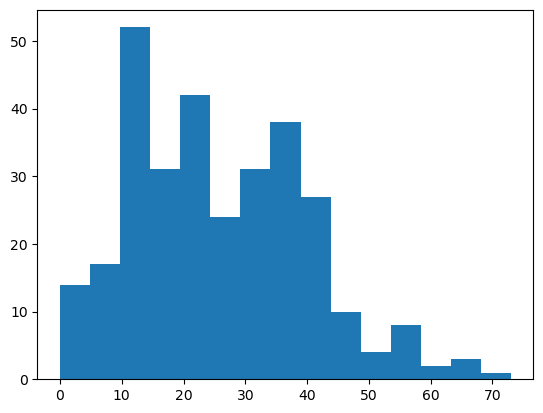

In [80]:
hist_games["Total"] = hist_games["Home Points"] + hist_games["Away Points"]
results = np.concatenate((hist_games["Home Points"].to_numpy(),hist_games["Away Points"].to_numpy()),axis=None)
avg_total = np.mean(results)
total_std = np.std(results)
plt.hist(results,bins=15)

(array([ 8., 12., 15., 26., 19., 23., 14.,  2.,  6.,  1.]),
 array([ 7.08826787, 13.98788195, 20.88749603, 27.78711011, 34.68672419,
        41.58633827, 48.48595235, 55.38556643, 62.28518051, 69.18479459,
        76.08440868]),
 <BarContainer object of 10 artists>)

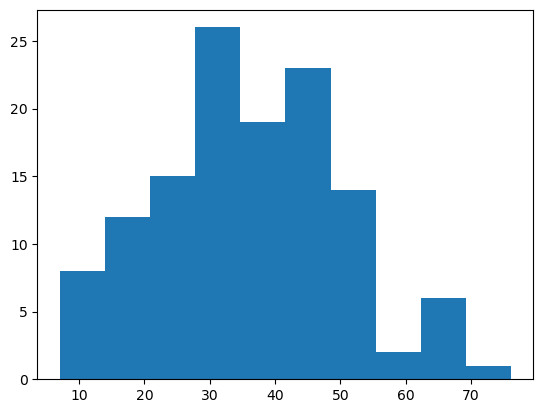

In [75]:
week4["Total"] = week4["Home Pts"] + week4["Away Pts"]
preds = np.concatenate((week4["Home Pts"].to_numpy(),week4["Away Pts"].to_numpy()),axis=None)
pred_avg = np.mean(preds)
pred_std = np.std(preds)
plt.hist(preds)

(array([ 8., 11., 10., 18., 15., 16., 18., 10., 11.,  2.,  5.,  1.,  1.]),
 array([ 0.        ,  5.09957684, 10.19915368, 15.29873052, 20.39830736,
        25.4978842 , 30.59746104, 35.69703788, 40.79661472, 45.89619156,
        50.9957684 , 56.09534524, 61.19492208, 66.29449892]),
 <BarContainer object of 13 artists>)

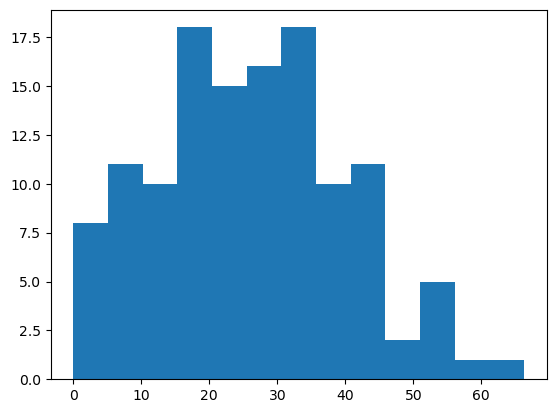

In [81]:
scaled_preds = avg_total + (preds-pred_avg)*(total_std/pred_std)
scaled_preds[scaled_preds < 0] = 0
plt.hist(scaled_preds,bins=13)

In [78]:
home, away = np.split(scaled_preds,2)
week4["Home Pts"] = home
week4["Away Pts"] = away
week4.head()

,Id,Season,Week,Season Type,Completed,Neutral Site,Venue,Home Team,Home Conference,Home Division,...,Away Team,Away Conference,Away Division,Away Pregame Elo,Home Win Prob,Raw Offense (Home),Raw Offense (Away),Home Pts,Away Pts,Total
0,401531849,2023,4,regular,False,False,Brooks Stadium,Coastal Carolina,Sun Belt,fbs,...,Georgia State,Sun Belt,fbs,1544.0,0.335142,34.766941,44.208596,35.422197,34.020859,89.553542
1,401520266,2023,4,regular,False,False,Ross-Ade Stadium,Purdue,Big Ten,fbs,...,Wisconsin,Big Ten,fbs,1682.0,0.212073,37.306937,34.050307,36.504323,37.353613,93.931321
2,401525505,2023,4,regular,False,False,Scott Stadium,Virginia,ACC,fbs,...,NC State,ACC,fbs,1528.0,0.208251,28.131237,22.916166,27.319845,38.466135,85.927200
3,401532583,2023,4,regular,False,False,Snapdragon Stadium,San Diego State,Mountain West,fbs,...,Boise State,Mountain West,fbs,1544.0,0.335142,22.519948,15.977099,27.518521,21.438058,69.239231
4,401532584,2023,4,regular,False,False,Spartan Stadium,San José State,Mountain West,fbs,...,Air Force,Mountain West,fbs,1701.0,0.135453,29.523150,8.398866,18.503986,13.052897,51.985758


In [79]:
week4.to_csv("Week4-Predictions.csv")